<a href="https://colab.research.google.com/github/kmkar31/Keras-inbuilt-Datasets/blob/master/Reuters_Dataset_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np

Using TensorFlow backend.


### Get Data from keras.datasets.load_data

#### The load_data argument tokenizes the sentences , splits into test and train data and also limits the max size to 10,000 words

In [0]:
(Xtrain , Ytrain) , (Xtest , Ytest) = keras.datasets.reuters.load_data(test_split=0.2 , num_words = 10000)

### The Vocabulary is a dictionary that contains mapping of words to their token values

In [0]:
Vocabulary = keras.datasets.reuters.get_word_index(path="reuters_word_index.json")
Vocabulary['<ooV>'] = 0

### The Inverse_Vocabulary contains mapping from tokens to corresponding words

In [0]:
Inverse_Vocabulary =  {values: keys for keys, values in Vocabulary.items()}

In [5]:
Xtrain.shape

(8982,)

### This function converts a sequence of tokens into the equivalent string

In [0]:
def get_text(sequence):
  text = [Inverse_Vocabulary[x] for x in sequence]
  return " ".join(text)

In [7]:
print(get_text(Xtrain[0]))

the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


### The Vectorize function performs a one-hot encoding of the sequence data

In [0]:
def Vectorize(X):
  temp = np.zeros((len(X) , 10000))
  for i , X in enumerate(X):
    temp[i , X] = 1
  return temp

In [0]:
X_train = Vectorize(Xtrain)
X_test = Vectorize(Xtest)

This functions convert the labels into One-Hot encoded format

In [0]:
def one_hot(Y):
  return keras.utils.to_categorical(Y , num_classes = 46)

In [0]:
Ytrain = one_hot(Ytrain)

In [12]:
X_train.shape

(8982, 10000)

In [13]:
X_test.shape

(2246, 10000)

### Create Validation Data and labels

In [0]:
X_val = X_train[:1000]
Y_val = Ytrain[:1000]

### Define the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense , Dropout

In [16]:
model = Sequential()

model.add(Dense(512 , input_shape = (10000,) ,activation = 'relu' ,kernel_initializer = 'he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(46 , activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                23598     
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


### Compile and train the model

In [0]:
model.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [18]:
history = model.fit(X_train[1000:] , Ytrain[1000:] , validation_data = (X_val , Y_val) , shuffle = True , epochs = 30 , batch_size = 4 , use_multiprocessing = True , verbose = 1)

Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 88s 11ms/step - loss: 1.5446 - accuracy: 0.7021 - val_loss: 1.4643 - val_accuracy: 0.7560
Epoch 2/30
7982/7982 [==============================] - 88s 11ms/step - loss: 1.3582 - accuracy: 0.7848 - val_loss: 1.9745 - val_accuracy: 0.7700
Epoch 3/30
7982/7982 [==============================] - 90s 11ms/step - loss: 1.3072 - accuracy: 0.8136 - val_loss: 2.0573 - val_accuracy: 0.7900
Epoch 4/30
7982/7982 [==============================] - 90s 11ms/step - loss: 1.2362 - accuracy: 0.8324 - val_loss: 2.4041 - val_accuracy: 0.7980
Epoch 5/30
7982/7982 [==============================] - 90s 11ms/step - loss: 1.1266 - accuracy: 0.8440 - val_loss: 2.7994 - val_accuracy: 0.7870
Epoch 6/30
7982/7982 [==============================] - 89s 11ms/step - loss: 1.0797 - accuracy: 0.8545 - val_loss: 2.9003 - val_accuracy: 0.7890
Epoch 7/30
7982/7982 [==============================] - 88s 11ms/step - loss

### Plot the Training and Validation accuracy as a function of epochs

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

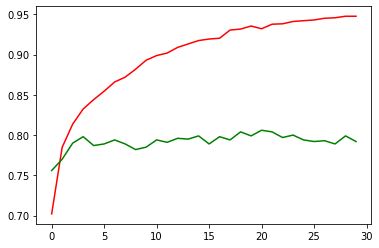

In [20]:
plt.plot(history.history['accuracy'] , color = 'red')
plt.plot(history.history['val_accuracy'] , color = 'green')

### Predict the Labels for the testing data

In [0]:
y_predict = model.predict(X_test)

### Print the testing Accuracy

In [22]:
y_predict = np.argmax(y_predict , axis = 1)
print("Testing Accuracy = " , np.mean(Ytest==y_predict)*100 , "%")

Testing Accuracy =  77.96081923419412 %


### Save the Model and Weights

In [0]:
model_json = model.to_json()
with open("Reuters_Keras_model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("Reuters_Keras_weights.h5")